# Advertising Sales Channel Prediction

# Problem Statement

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

# Importing requried Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading dataset
df=pd.read_csv('P5Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
## Checking the shape the dataset
df.shape

(200, 5)

1- Our dataset have 200 rows and 5 columns including Traget column

2-Sales is our target attribute.

3- This is a regression problem statement.

In [4]:
## Checking datatype of dataset
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

Observation

1- All the attributes have a numeric datatype.

2- Our datatype of all attributes is ok.

In [5]:
## Checking info for our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


1- from above observation we can see that there is no null values present in our dataset.

2- Unnamed:0 column is a kind of index column we can drop in next step.
    


In [6]:
## Checking null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Observation

1- There is no null values present in our dataset.

<AxesSubplot:title={'center':'Null Values Heatmap'}>

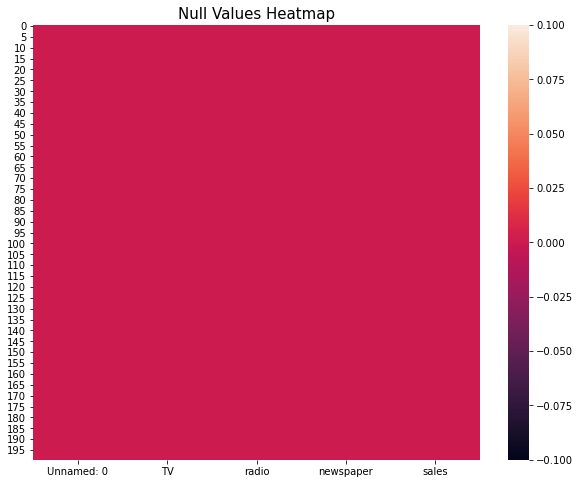

In [7]:
## Plotting Null values on heatmap
plt.figure(figsize=(10,8))
plt.title('Null Values Heatmap',fontsize=15)
sns.heatmap(df.isnull())

No null value present in our dataset.

# Statistical Summary

In [8]:
## statistical Summary
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Observation

1- Our dataset seems to be normally distributed because mean and median values are nearly close to each other.

2-There could be some outliers present in newspaper column because there is a compartively high difference between 3rd quantile and max values.

3- Radio attribute has a minimum zero value in our dataset which could be part of further investigation in our dataset.

<AxesSubplot:title={'center':'Correlation Heatmap'}>

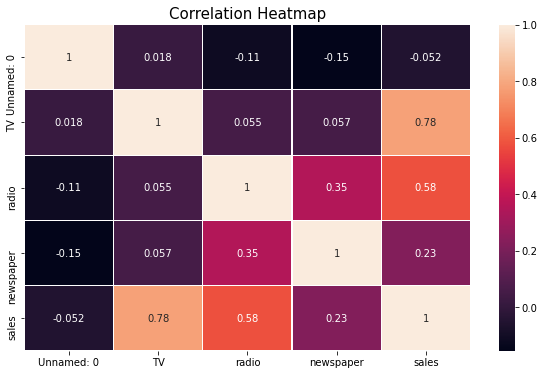

In [9]:
## Correlation Plot
plt.figure(figsize=(10,6))
plt.title('Correlation Heatmap',fontsize=15)
sns.heatmap(df.corr(),annot=True,linewidths=.2)

In [10]:
## Correlation with target attribute
df.corr()['sales'].sort_values(ascending=False)

sales         1.000000
TV            0.782224
radio         0.576223
newspaper     0.228299
Unnamed: 0   -0.051616
Name: sales, dtype: float64

Observation
1-Unnamed:0 have least and negative correlation with our target attribute.
    
2- TV and radio has a strong and positive correlation with targer attribute.

3-Newspaper and  radio are correlated to each other.

<AxesSubplot:title={'center':'Coreelation with Target'}>

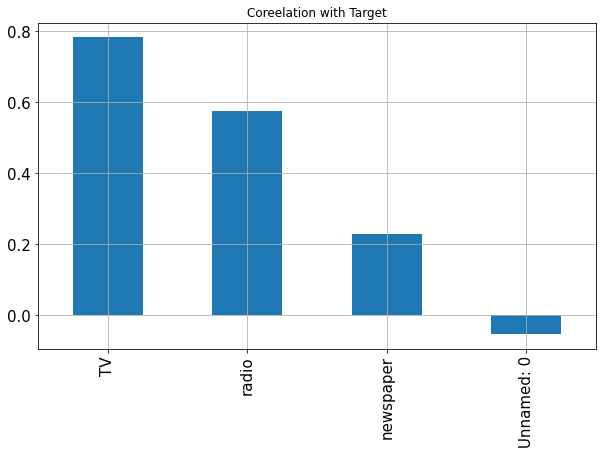

In [11]:
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot.bar(figsize=(10,6),grid=True,title='Coreelation with Target',fontsize=15)

observation:

1- TV, Radio have correlation more that 50% with target variable.

2- Unnnamed:0 has negative and very weak correlation with our target variable, we can drop as it has no significance with target variable.

# Data Analysis and Visualization 

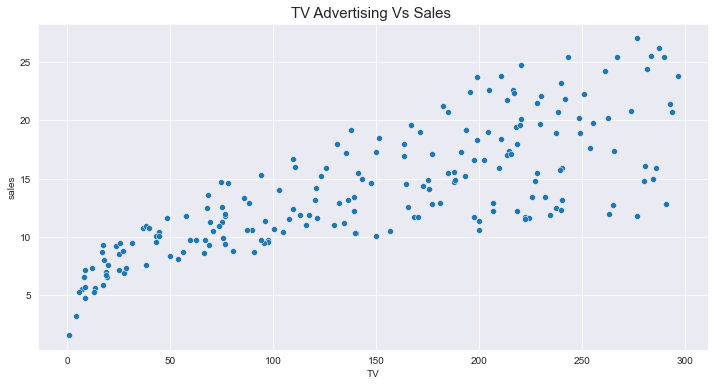

In [12]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('TV Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df['TV'],df['sales'],data=df)
plt.show()

Observation

1- There is a linear positive correlation between TV advertising and Sales.

2- As Tv advertising inceases sales also increases.


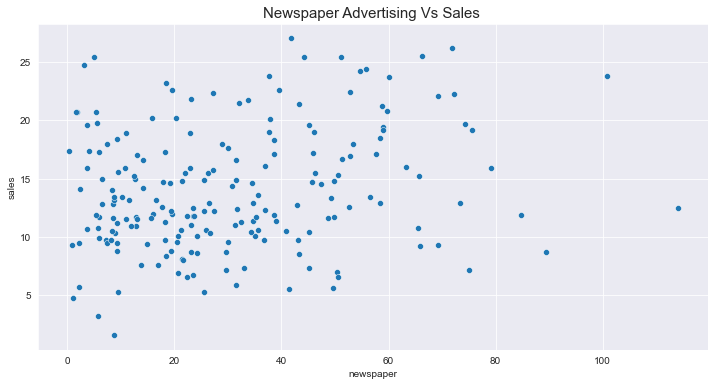

In [13]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('Newspaper Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df['newspaper'],df['sales'],data=df)
plt.show()

Observation

1- from above scatter plot we can see that there is a moderate realtionship with sales.

2- Datapoints are scattered we can't conclude from this plot

3-Some points are widly scattered.

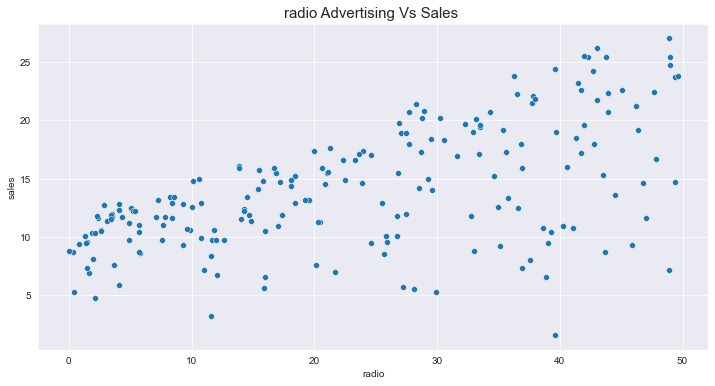

In [14]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
plt.title('radio Advertising Vs Sales ',fontsize=15)
sns.scatterplot(df['radio'],df['sales'],data=df)
plt.show()

Observation

1- This plot shows a positive linear relation between radio advertising and sales.

2- As radio advertising increases, sales also get increases.

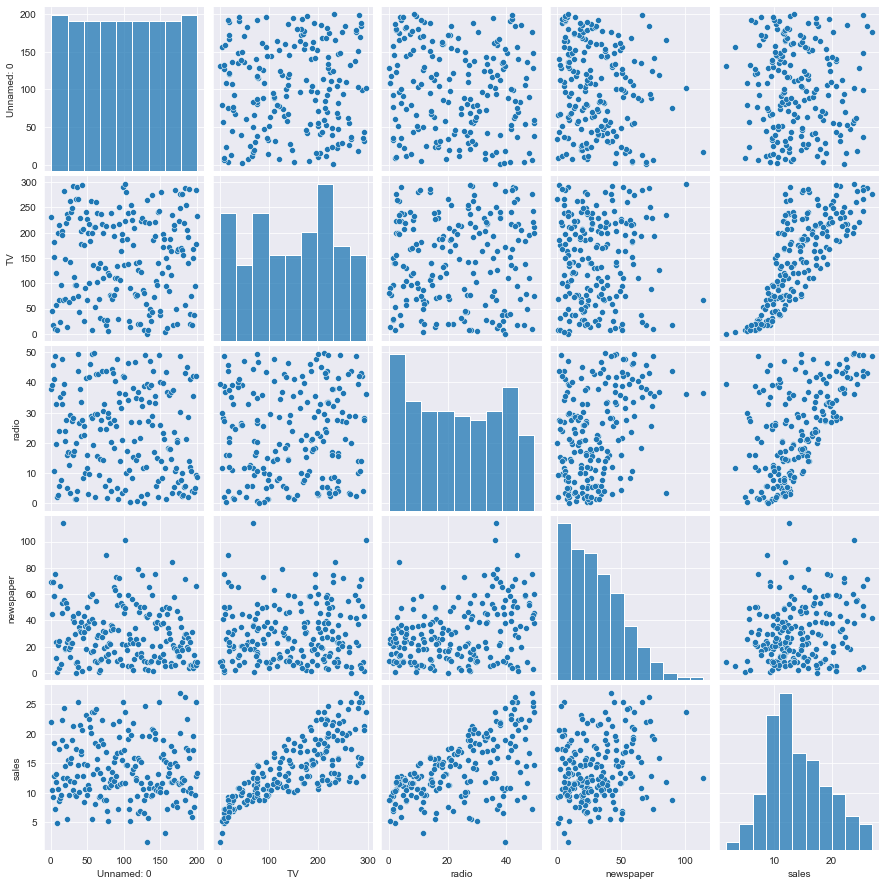

In [15]:
## Let's plot the pairplot for all the attributes together
sns.pairplot(df)

# Data Distribution

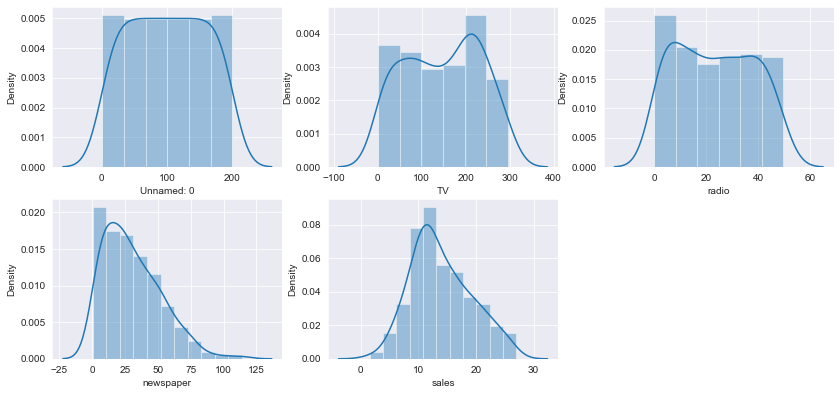

In [16]:
#Data Distribution
plt.figure(figsize=(14,10))
plot=1
for col in df:
    if plot<=5:
        plt.subplot(3,3,plot)
        sns.distplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()   

Observation

1- It shows that our dataset is approimately bell shaped in distribution means normally distributed.

2- Newspaper attribute is a little right skewed.

3- our target attribute is Normally distributed.


# Checking Outliers

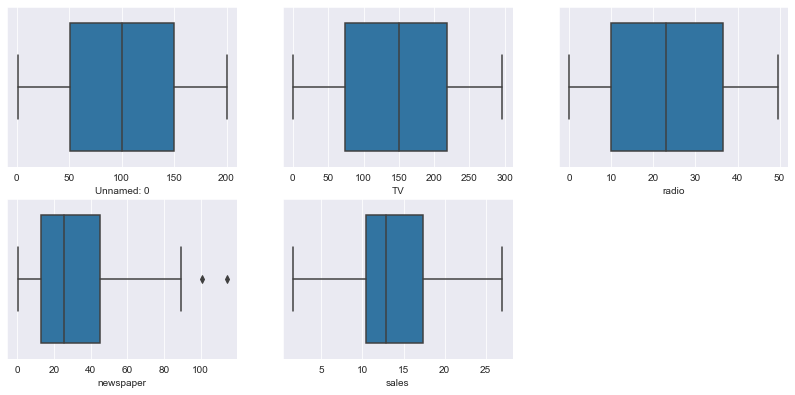

In [17]:
plt.figure(figsize=(14,10))
plot=1
for col in df:
    if plot<=5:
        plt.subplot(3,3,plot)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()   

In [18]:
def outlier_normally(df,col):
    lower_boundary=df[col].mean()-3*df[col].std()
    upper_boundary=df[col].mean()+3*df[col].std()
    print(lower_boundary,upper_boundary)
    df[col]=np.where((df[col]<lower_boundary)|(df[col]>upper_boundary),df[col].median(),df[col])
    sns.boxplot(df[col])

-34.7818625155685 95.8898625155685


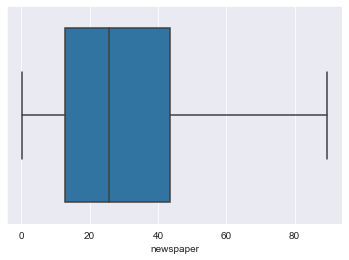

In [19]:
outlier_normally(df,'newspaper')

we have replaced the outliers with median , now there is no outliers present in our dataset.

We can see that our dataset has no outliers present.

# Skewness

In [20]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.658874
sales         0.407571
dtype: float64

We can see that for Newspaper attribute skewness is more than .5 so we will remove this with some transformation methods.

In [21]:
df['newspaper']=np.sqrt(df['newspaper'])

In [22]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper    -0.040656
sales         0.407571
dtype: float64

Observation:
    
1- Now we can see that skewness is completly removed from our dataset.

# Splitting data into Input and Output Variable

In [23]:
x=df.drop(['Unnamed: 0','sales'],axis=1)  ## We have drop unnamed :0 because this attribute has no significance for predicting sales.
y=df[['sales']]

In [24]:
x

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989
...,...,...,...
195,38.2,3.7,3.714835
196,94.2,4.9,2.846050
197,177.0,9.3,2.529822
198,283.6,42.0,8.136338


In [25]:
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


# Scaling


In [31]:
from sklearn.preprocessing import StandardScaler

In [38]:
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,TV,radio,newspaper
0,0.969852,0.981522,1.645000
1,-1.197376,1.082808,0.829028
2,-1.516155,1.528463,1.648059
3,0.052050,1.217855,1.303888
4,0.394182,-0.841614,1.300559
...,...,...,...
195,-1.270941,-1.321031,-0.698474
196,-0.617035,-1.240003,-1.140710
197,0.349810,-0.942899,-1.301679
198,1.594565,1.265121,1.552196


Dataset is not scaled in form of Standard Scaling 

# Feature Importance

In [41]:
from sklearn.ensemble import ExtraTreesRegressor
extra=ExtraTreesRegressor()
extra.fit(x,y)

ExtraTreesRegressor()

In [42]:
print(extra.feature_importances_)

[0.61599867 0.37739299 0.00660834]


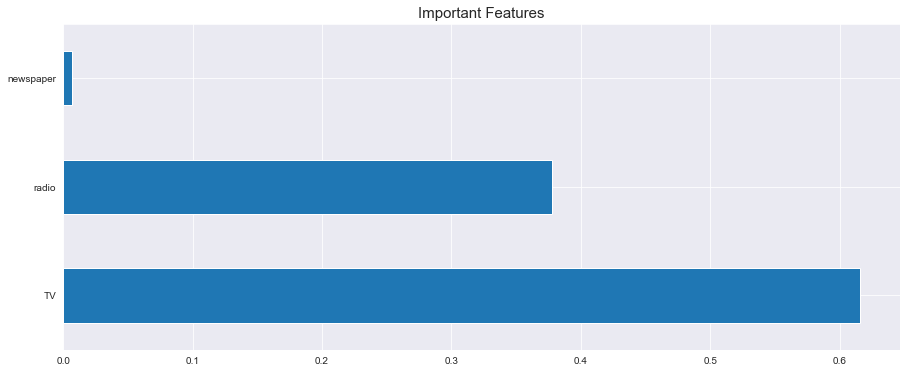

In [44]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest().plot(kind='barh')
plt.show()

we can see that radio and TV are highly important features for our target column to predict the right sales price.

# Model Building 

In [48]:
## Importing machine learning Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [49]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1)
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean())
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std())
    print('Training accuracy',clf.score(x_train,y_train))
    print('Test Accuracy',clf.score(x_test,y_test))
    print('MAE',mean_absolute_error(y_test,pred))
    print('MSE',mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    
    return final_r


In [50]:
# Linerar regression
lr=LinearRegression()
maxr2_score(lr,x,y)

max r2 score corresponding to 92 is 0.9515375445674435
cross validation score 0.8874289458669636
Standard Deviation 0.03990929854330095
Training accuracy 0.890810705879388
Test Accuracy 0.9188727395820788
MAE 1.1592043558674558
MSE 2.079624306279033
RMSE 1.442090255940672


92

In [51]:
#Lasso Regression
lasso=Lasso()
maxr2_score(lasso,x,y)

max r2 score corresponding to 83 is 0.8616707145490253
cross validation score 0.8175135660884789
Standard Deviation 0.04816955790793656
Training accuracy 0.8207247509119465
Test Accuracy 0.8407357569037717
MAE 1.4975447804611441
MSE 4.082595533953025
RMSE 2.0205433759147624


83

In [52]:
## ridge regression
ridge=Ridge()
maxr2_score(ridge,x,y)

max r2 score corresponding to 92 is 0.95125522506385
cross validation score 0.8874948915182891
Standard Deviation 0.04033574508512037
Training accuracy 0.8907790915823749
Test Accuracy 0.9186462100001408
MAE 1.1632500944990776
MSE 2.0854311882353906
RMSE 1.4441022083756367


92

In [53]:
##Decision Tree Regressor
dt=DecisionTreeRegressor()
maxr2_score(dt,x,y)


max r2 score corresponding to 75 is 0.9797456434811287
cross validation score 0.9472269718630459
Standard Deviation 0.010023942243987621
Training accuracy 1.0
Test Accuracy 0.9371637779364206
MAE 0.8374999999999998
MSE 1.61075
RMSE 1.2691532610366645


75

In [54]:
## KNN
knn=KNeighborsRegressor()
maxr2_score(knn,x,y)

max r2 score corresponding to 61 is 0.9639487545207585
cross validation score 0.9330030376371383
Standard Deviation 0.03059765905442555
Training accuracy 0.9513356956500039
Test Accuracy 0.9234273877374279
MAE 0.8995000000000003
MSE 1.9628699999999994
RMSE 1.4010246250512512


61

In [57]:
## sUPPORT vECTOR
svm=SVR()
maxr2_score(svm,x,y)

max r2 score corresponding to 45 is 0.9763358231098598
cross validation score 0.9045732839730547
Standard Deviation 0.055209774393147254
Training accuracy 0.9272924392642631
Test Accuracy 0.9146031876225645
MAE 0.8671469648057636
MSE 2.1890704281644178
RMSE 1.4795507521421554


45

In [58]:
##Random Forest
rf=RandomForestRegressor()
maxr2_score(rf,x,y)

max r2 score corresponding to 48 is 0.9890662524147924
cross validation score 0.9759292914564919
Standard Deviation 0.008164953022903786
Training accuracy 0.9962115923771839
Test Accuracy 0.9844930844070983
MAE 0.5022750000000038
MSE 0.39750582500000287
RMSE 0.6304806301544901


48

In [59]:
## Adaboost Regessor
adb=AdaBoostRegressor()
maxr2_score(adb,x,y)

max r2 score corresponding to 70 is 0.9773408966297875
cross validation score 0.95229920714222
Standard Deviation 0.012521918201118977
Training accuracy 0.975142730399645
Test Accuracy 0.9570936003112017
MAE 0.8830921663103461
MSE 1.0998669402626249
RMSE 1.0487454125108844


70

In [60]:
## Gardient Boost Regressor
gb=GradientBoostingRegressor()
maxr2_score(gb,x,y)

max r2 score corresponding to 69 is 0.9905579415121392
cross validation score 0.9775191405463864
Standard Deviation 0.009275504911095243
Training accuracy 0.9985290210924179
Test Accuracy 0.9828659867818171
MAE 0.4773398931910918
MSE 0.43921500823622184
RMSE 0.6627329841166968


69

In [63]:
Best_model=best_model=pd.DataFrame({'Model':['LinearRegression','Lasso','Ridge','DecisionTreeRegressor','KNeighborsRegressor','SVM','RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor'],
                         'R_2 score':[95.15,86.16,95.12,97.97,96.39,97.63,98.90,97.73,99.05],
                         'Cross_validation':[88.74,81.75,88.74,94.72,93.30,90.43,97.59,92.22,97.75]})
best_model                        

,Model,R_2 score,Cross_validation
0,LinearRegression,95.15,88.74
1,Lasso,86.16,81.75
2,Ridge,95.12,88.74
3,DecisionTreeRegressor,97.97,94.72
4,KNeighborsRegressor,96.39,93.30
5,SVM,97.63,90.43
6,RandomForestRegressor,98.90,97.59
7,AdaBoostRegressor,97.73,92.22
8,GradientBoostingRegressor,99.05,97.75


From above table it is clear that Random Forest Regressor if our best model because the difference between R_2 score and Cross validation score is minimum which shows that our Model is not overfit and best among all.

# Hyperparameter Tuning for Random Forest

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=.20)
forest=RandomForestRegressor()
param={'n_estimators':[50,100,200],'max_depth':[10,50,None],'max_features': [1,2,3],'bootstrap': [True, False]}
glf=GridSearchCV(estimator=forest,param_grid=param,scoring='r2',n_jobs=-1)
glf.fit(x_train,y_train)
glf.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'n_estimators': 50}

Error
 Mean Absolute Error (MAE) : 0.4701460119047609
Mean Squared Error (MSE) : 0.3534619639468521
Root Mean Squared Error : 0.5945266721912921
R_2 score: 0.9873013858550095


<AxesSubplot:ylabel='sales'>

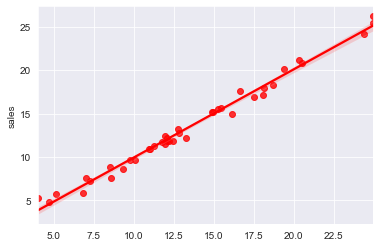

In [77]:
forest=RandomForestRegressor(bootstrap=True,max_depth=10,max_features=3,n_estimators=50)
forest.fit(x_train,y_train)
pred=forest.predict(x_test)
print('Error')
print(' Mean Absolute Error (MAE) :',mean_absolute_error(pred,y_test))
print('Mean Squared Error (MSE) :',mean_squared_error(pred,y_test))
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(pred,y_test)))
print('R_2 score:',r2_score(pred,y_test))
## best fit line
sns.regplot(pred,y_test,color='r')

We can see that with Hyperparameter tuning our R_2 score is 98.57 which is improved hence we will save this as our best Model.


# saving our Model


In [79]:
import joblib
joblib.dump(forest,'advertiseforest.pkl')

['advertiseforest.pkl']

# Loading Model

In [81]:
loaded_model=joblib.load('advertiseforest.pkl')
prediction=loaded_model.predict(x_test)